# walmart-recruiting-store-sales-forecasting

https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

# 1. Introduction
Forecasting of Walmart Store Sales is the task of making weekly sales predictions for each store and department (y-Weekly_Sales). The providing data are as follows:

Target:
1. Weekly sales (numeric) - (Time dependence)

Features:
1. Store number (Nominal) - (Time independence)
2. Department number (Nominal) - (Time independence)
3. Date - (Time)
4.  Holiday (boolean - Nominal) - It has been scheduled; thus, using this data won't lead to data leaking.
5. Store Type (Nominal) - (Time independence)
6. Store Size (Nominal) - (Time independence)
7. Temperature (numeric) - (Time dependence)
8. Fuel Price (numeric) - (Time dependence)
9. CPI (numeric) - (Time dependence)
10. Unemployment (numeric) - (Time dependence)

# 2. Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2.1 data information

In [2]:
features = pd.read_csv('walmart-recruiting-store-sales-forecasting/features.csv')
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [3]:
stores = pd.read_csv('walmart-recruiting-store-sales-forecasting/stores.csv')
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [4]:
train = pd.read_csv('walmart-recruiting-store-sales-forecasting/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
test = pd.read_csv('walmart-recruiting-store-sales-forecasting/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


## 2.2 data previews

In [6]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [7]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [8]:
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


## 2.3 Explore the weekly sales on the store 1, the department 1

I found that the weekly sales of the first store, department 1st, have their pattern and are able to be learned.

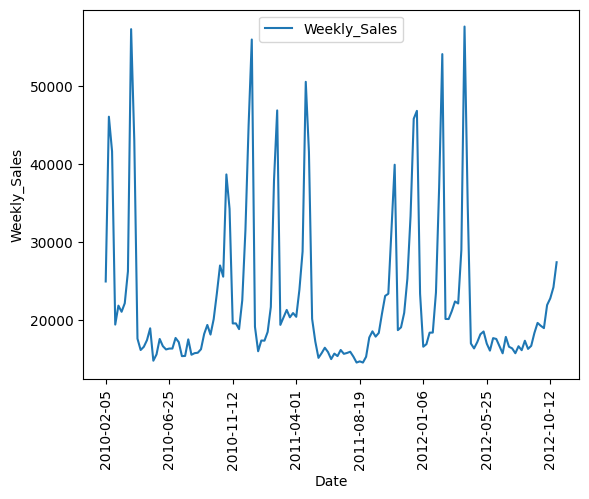

In [10]:
train[(train.Store == 1)*(train.Dept == 1)].plot.line(x = 'Date', y = 'Weekly_Sales')
plt.ylabel('Weekly_Sales')
plt.xticks(rotation=90)
plt.show()

## 2.4 Explore the weekly sales on the store 1, all department

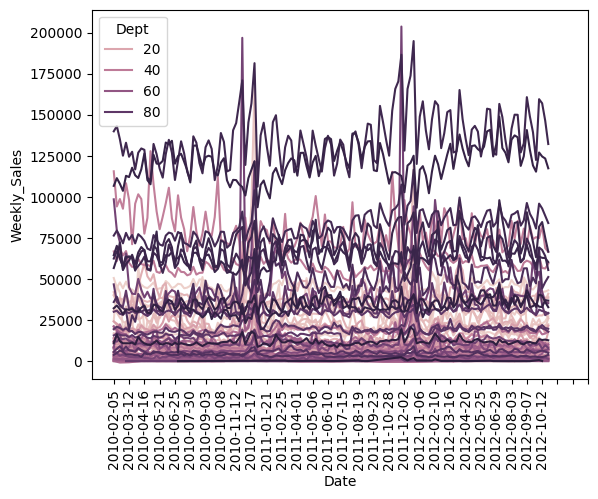

In [11]:
import seaborn as sns
df = train[(train.Store == 1)]
sns.lineplot(data=df, x="Date", y="Weekly_Sales", hue="Dept")
plt.xticks(rotation=90)
plt.xticks([i*5 for i in range((155)//5 + 1)])
plt.show()

## 2.5 Explore the weekly sales on all store, all department
Here I try to visualize the average weekly sale for each store and department. Some relation is revealed.

<AxesSubplot: xlabel='Store', ylabel='Dept'>

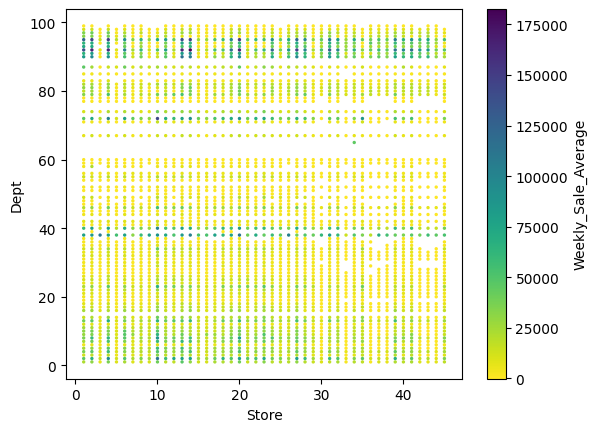

In [12]:
train.groupby(['Store','Dept']).mean().reset_index().rename(columns={'Weekly_Sales': 'Weekly_Sale_Average'}).plot.scatter(
    x='Store', y='Dept', c='Weekly_Sale_Average', s = 2, colormap='viridis_r'
)

In [13]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


# 3. data preparation

#### merge dataframe

In [14]:
train_df = pd.merge(train, stores, how="left", left_on=["Store"], right_on =  ["Store"])
train_df = pd.merge(train_df, features, how="left", left_on=["Store", "Date", "IsHoliday"], right_on = ["Store", "Date", 'IsHoliday'])
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [15]:
test_df = pd.merge(test, stores, how="left", left_on=["Store"], right_on =  ["Store"])
test_df = pd.merge(test_df, features, how="left", left_on=["Store", "Date", "IsHoliday"], right_on = ["Store", "Date", "IsHoliday"])
test_df

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


In [16]:
train_df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [17]:
train_df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


#### 3.0 create training_df_dummy for normalization with the same ratio as actual training in train test val split.

In [18]:
training_df_dummy = list()
for i in range(train_df.Store.max()):
    for j in range(train_df.Dept.max()):
        df = train_df[(train_df.Store == i+1)*(train_df.Dept == j+1)].reset_index(drop=True)
        l = int(0.6*len(df))
        training_df_dummy.append(df.iloc[:l])
training_df_dummy = pd.concat(training_df_dummy)

## 3.1 drop nan data of column 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'

Since the proportion of NaN items in the selected columns exceeds 50%, the columns of 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', and 'MarkDown5' have to be dropped.

In [19]:
train_df.isnull().mean()

Store           0.000000
Dept            0.000000
Date            0.000000
Weekly_Sales    0.000000
IsHoliday       0.000000
Type            0.000000
Size            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.642572
MarkDown2       0.736110
MarkDown3       0.674808
MarkDown4       0.679847
MarkDown5       0.640790
CPI             0.000000
Unemployment    0.000000
dtype: float64

In [20]:
test_df.isnull().mean()

Store           0.000000
Dept            0.000000
Date            0.000000
IsHoliday       0.000000
Type            0.000000
Size            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.001295
MarkDown2       0.248792
MarkDown3       0.085422
MarkDown4       0.112007
MarkDown5       0.000000
CPI             0.331659
Unemployment    0.331659
dtype: float64

In [21]:
train_df.drop(columns=[ 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',],inplace=True)
test_df.drop(columns=[ 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',],inplace=True)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 35.8+ MB


In [23]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667


In [24]:
test_df

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,B,118221,76.05,3.639,NaN,NaN
115060,45,98,2013-07-05,False,B,118221,77.50,3.614,NaN,NaN
115061,45,98,2013-07-12,False,B,118221,79.37,3.614,NaN,NaN
115062,45,98,2013-07-19,False,B,118221,82.84,3.737,NaN,NaN


## 3.2 Date transform
	1. transform the object in col 'Date' to 'datetime' datatype.
	2. create columns of weeks, months, and years columns.

In [25]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

train_df['Date'] =  pd.to_datetime(train_df['Date'], infer_datetime_format=True)
train_df['week'] = pd.DatetimeIndex(train_df['Date']).week
train_df['month'] = pd.DatetimeIndex(train_df['Date']).month
train_df['year'] = pd.DatetimeIndex(train_df['Date']).year 

test_df['Date'] =  pd.to_datetime(test_df['Date'], infer_datetime_format=True)
test_df['week'] = pd.DatetimeIndex(test_df['Date']).week
test_df['month'] = pd.DatetimeIndex(test_df['Date']).month
test_df['year'] = pd.DatetimeIndex(test_df['Date']).year

#train_df.drop(columns=['Date'],inplace=True)
#test_df.drop(columns=['Date'],inplace=True)

C:\Users\posso\AppData\Local\Temp\ipykernel_8256\3460947773.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train_df['week'] = pd.DatetimeIndex(train_df['Date']).week
C:\Users\posso\AppData\Local\Temp\ipykernel_8256\3460947773.py:10: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  test_df['week'] = pd.DatetimeIndex(test_df['Date']).week


In [26]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,9,3,2010


## 3.3 IsHoliday transform
	3.3.1. Note that 'IsHoliday ' is a crucial feature since it is believed that it can influence the weekly sale (target). I need to make sure the proportion of holidays in both 'train_df' and 'test_df' are the same; our training, validation, and testing set will be split from the "train_df" data frame.
	3.3.2. I plot the box plot of holidays and weekly sales for quick review (expect to see the effect of holidays on the sales) and found that the sales have ts outliner. The outliner is trimmed by lower_range of Q1 - 1.5 * IQR and upper_range of Q3 + 1.5 * IQR.
	3.3.3. After eliminating the outliner, the box plot doesn't reveal the expected result.
	3.3.4. transform the boolean datatype of 'IsHoliday ' to int type

### 3.3.1 the proportion of holidays

In [27]:
train_df.IsHoliday.value_counts(normalize = True)

False    0.929642
True     0.070358
Name: IsHoliday, dtype: float64

In [28]:
test_df.IsHoliday.value_counts(normalize = True)

False    0.922408
True     0.077592
Name: IsHoliday, dtype: float64

### 3.3.2 box plot and outliner

<AxesSubplot: title={'center': 'Weekly_Sales'}, xlabel='IsHoliday'>

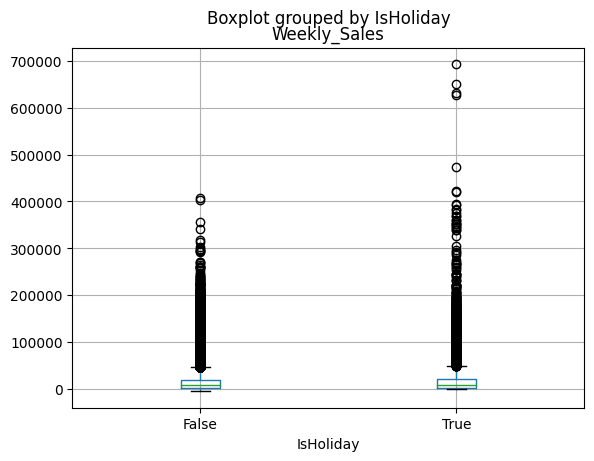

In [29]:
train_df.boxplot(column = 'Weekly_Sales', by = 'IsHoliday')

#### eliminating the outliner

In [34]:
import numpy as np
Q3 = np.quantile(train_df.Weekly_Sales, 0.75)
Q1 = np.quantile(train_df.Weekly_Sales, 0.25)
IQR = Q3 - Q1

lower_range = np.max([Q1 - 1.5 * IQR,0])
upper_range = Q3 + 1.5 * IQR

In [35]:
lower_range

0.0

In [36]:
train_df['Weekly_Sales'] = train_df['Weekly_Sales'].map(lambda x: x if x > lower_range else lower_range)
train_df['Weekly_Sales'] = train_df['Weekly_Sales'].map(lambda x: x if x < upper_range else upper_range)

### 3.3.3. After eliminating the outliner

<AxesSubplot: title={'center': 'Weekly_Sales'}, xlabel='IsHoliday'>

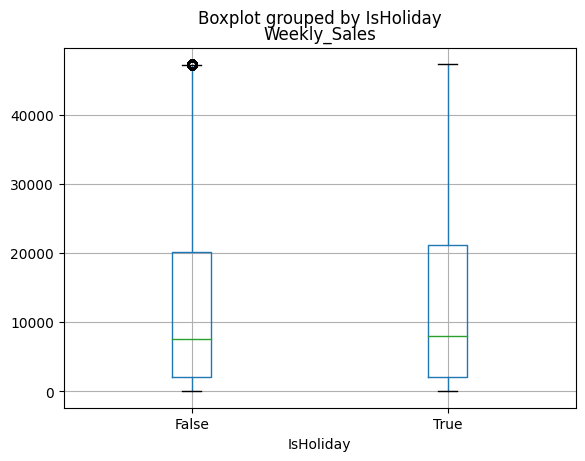

In [37]:
train_df.boxplot(column = 'Weekly_Sales', by = 'IsHoliday')

### 3.3.4. transform the boolean datatype of 'IsHoliday ' to int type

In [38]:
train_df['IsHoliday']=train_df['IsHoliday'].astype(int)
test_df['IsHoliday']=test_df['IsHoliday'].astype(int)

In [39]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,211.350143,8.106,9,3,2010


## 3.4 Store Type transform
	3.4.1 explore the inner ratio for each store type
	3.4.2 box plot
	3.4.3 transform to int type

### 3.4.1 explore the inner ratio for each store type

In [40]:
test_df.Type.value_counts(normalize = True)

A    0.510264
B    0.386741
C    0.102995
Name: Type, dtype: float64

In [41]:
train_df.Type.value_counts(normalize = True)

A    0.511132
B    0.387824
C    0.101044
Name: Type, dtype: float64

### 3.4.2 box plot

<AxesSubplot: title={'center': 'Weekly_Sales'}, xlabel='Type'>

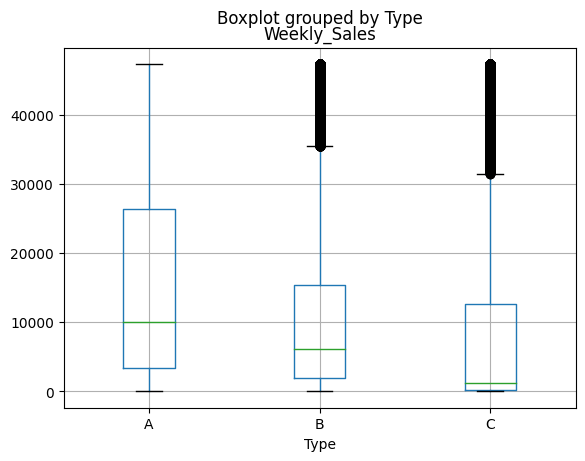

In [42]:
train_df.boxplot(column = 'Weekly_Sales', by = 'Type')

### 3.4.3 transform to int type

In [43]:
train_df['Type'] = train_df['Type'].map({'A':1,'B':2,'C':3})
test_df['Type'] = test_df['Type'].map({'A':1,'B':2,'C':3})

In [44]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,211.350143,8.106,9,3,2010


## 3.5 Explore/Transform the Size of stores
	3.5.1 histogram plot
	3.5.2 corporation
	3.5.3 normalization

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int32         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  week          421570 non-null  int64         
 12  month         421570 non-null  int64         
 13  year          421570 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(7)
memory usage: 4

### 3.5.1 histogram plot

<AxesSubplot: ylabel='Frequency'>

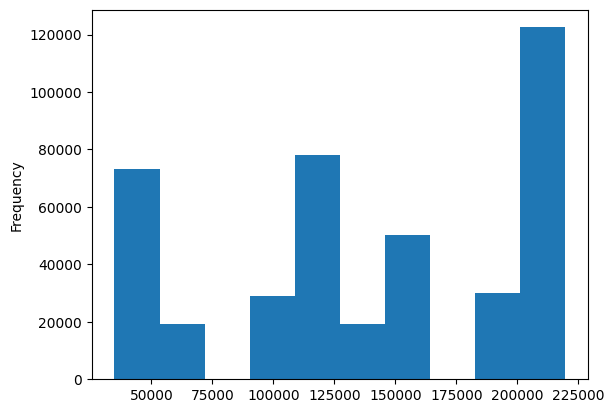

In [46]:
train_df.Size.plot.hist(bins=10)

### 3.5.2 corporation

In [47]:
train_df[["Weekly_Sales", "Size"]].corr()

,Weekly_Sales,Size
Weekly_Sales,1.000000,0.262093
Size,0.262093,1.000000


### 3.5.3 normalization

In [48]:
mean_size = training_df_dummy.Size.mean()
std_size = training_df_dummy.Size.std()
train_df['Size'] = (train_df['Size'] - mean_size) / std_size
test_df['Size'] = (test_df['Size'] - mean_size) / std_size

In [49]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,0,1,0.239211,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,1,1,0.239211,38.51,2.548,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,0,1,0.239211,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,0,1,0.239211,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,0,1,0.239211,46.50,2.625,211.350143,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,-0.303517,64.88,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,0,2,-0.303517,64.89,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,0,2,-0.303517,54.47,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,0,2,-0.303517,56.47,3.969,192.330854,8.667,42,10,2012


## 3.6 Temperature

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int32         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  float64       
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  week          421570 non-null  int64         
 12  month         421570 non-null  int64         
 13  year          421570 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(6)
memory usage: 4

In [51]:
train_df[["Weekly_Sales", "Temperature"]].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,0.002286
Temperature,0.002286,1.000000


<AxesSubplot: ylabel='Frequency'>

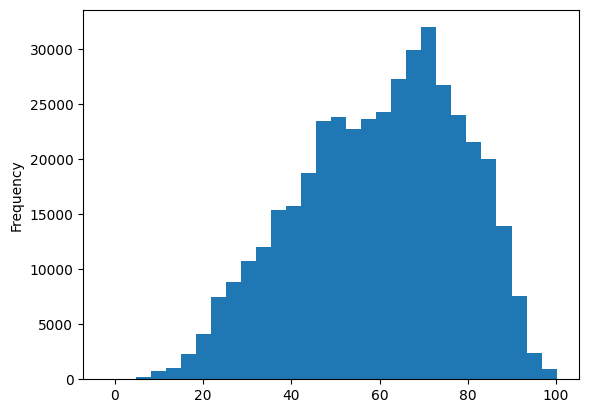

In [52]:
train_df.Temperature.plot.hist(bins=30)

### drop

In [53]:
train_df.drop(columns=['Temperature'],inplace=True)
test_df.drop(columns=['Temperature'],inplace=True)

In [54]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,0,1,0.239211,2.572,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,1,1,0.239211,2.548,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,0,1,0.239211,2.514,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,0,1,0.239211,2.561,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,0,1,0.239211,2.625,211.350143,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,-0.303517,3.997,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,0,2,-0.303517,3.985,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,0,2,-0.303517,4.000,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,0,2,-0.303517,3.969,192.330854,8.667,42,10,2012


In [55]:
test_df

,Store,Dept,Date,IsHoliday,Type,Size,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1,2012-11-02,0,1,0.239211,3.386,223.462779,6.573,44,11,2012
1,1,1,2012-11-09,0,1,0.239211,3.314,223.481307,6.573,45,11,2012
2,1,1,2012-11-16,0,1,0.239211,3.252,223.512911,6.573,46,11,2012
3,1,1,2012-11-23,1,1,0.239211,3.211,223.561947,6.573,47,11,2012
4,1,1,2012-11-30,0,1,0.239211,3.207,223.610984,6.573,48,11,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,2,-0.303517,3.639,NaN,NaN,26,6,2013
115060,45,98,2013-07-05,0,2,-0.303517,3.614,NaN,NaN,27,7,2013
115061,45,98,2013-07-12,0,2,-0.303517,3.614,NaN,NaN,28,7,2013
115062,45,98,2013-07-19,0,2,-0.303517,3.737,NaN,NaN,29,7,2013


## 3.6 Fuel_Price

<AxesSubplot: ylabel='Frequency'>

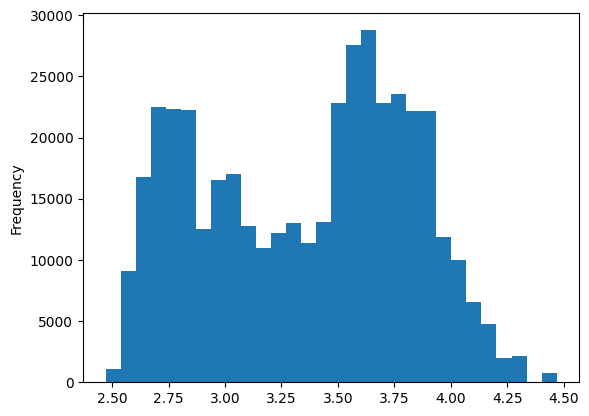

In [56]:
train_df.Fuel_Price.plot.hist(bins=30)

In [57]:
train_df[["Weekly_Sales", "Fuel_Price"]].corr()

,Weekly_Sales,Fuel_Price
Weekly_Sales,1.000000,0.003404
Fuel_Price,0.003404,1.000000


### drop

In [58]:
train_df.drop(columns=['Fuel_Price'],inplace=True)
test_df.drop(columns=['Fuel_Price'],inplace=True)

In [59]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,0,1,0.239211,211.096358,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,1,1,0.239211,211.242170,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,0,1,0.239211,211.289143,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,0,1,0.239211,211.319643,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,0,1,0.239211,211.350143,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,-0.303517,192.013558,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,0,2,-0.303517,192.170412,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,0,2,-0.303517,192.327265,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,0,2,-0.303517,192.330854,8.667,42,10,2012


## 3.7 CPI
   1. This attribute has dropped.

<AxesSubplot: ylabel='Frequency'>

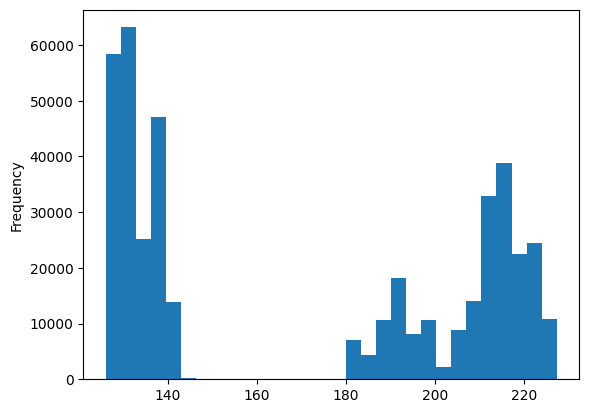

In [60]:
train_df.CPI.plot.hist(bins=30)

In [61]:
train_df[["Weekly_Sales", "CPI"]].corr()

,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.031202
CPI,-0.031202,1.000000


### drop

In [62]:
train_df.drop(columns=['CPI'],inplace=True)
test_df.drop(columns=['CPI'],inplace=True)

In [63]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,0,1,0.239211,8.106,5,2,2010
1,1,1,2010-02-12,46039.49,1,1,0.239211,8.106,6,2,2010
2,1,1,2010-02-19,41595.55,0,1,0.239211,8.106,7,2,2010
3,1,1,2010-02-26,19403.54,0,1,0.239211,8.106,8,2,2010
4,1,1,2010-03-05,21827.90,0,1,0.239211,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,-0.303517,8.684,39,9,2012
421566,45,98,2012-10-05,628.10,0,2,-0.303517,8.667,40,10,2012
421567,45,98,2012-10-12,1061.02,0,2,-0.303517,8.667,41,10,2012
421568,45,98,2012-10-19,760.01,0,2,-0.303517,8.667,42,10,2012


## 3.8 Unemployment

<AxesSubplot: ylabel='Frequency'>

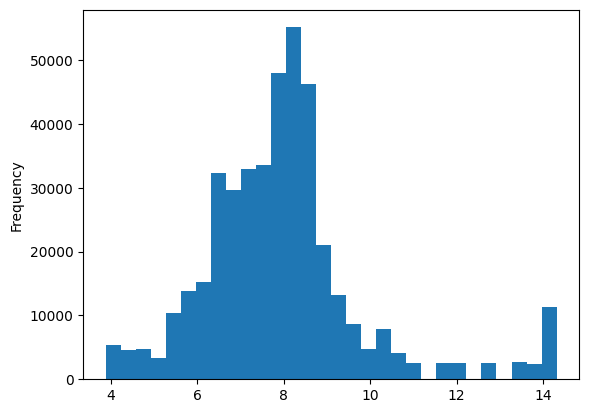

In [64]:
train_df.Unemployment.plot.hist(bins=30)

In [65]:
train_df[["Weekly_Sales", "Unemployment"]].corr()

,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,-0.020069
Unemployment,-0.020069,1.000000


### drop

In [66]:
train_df.drop(columns=['Unemployment'],inplace=True)
test_df.drop(columns=['Unemployment'],inplace=True)

In [67]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,0,1,0.239211,5,2,2010
1,1,1,2010-02-12,46039.49,1,1,0.239211,6,2,2010
2,1,1,2010-02-19,41595.55,0,1,0.239211,7,2,2010
3,1,1,2010-02-26,19403.54,0,1,0.239211,8,2,2010
4,1,1,2010-03-05,21827.90,0,1,0.239211,9,3,2010
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,-0.303517,39,9,2012
421566,45,98,2012-10-05,628.10,0,2,-0.303517,40,10,2012
421567,45,98,2012-10-12,1061.02,0,2,-0.303517,41,10,2012
421568,45,98,2012-10-19,760.01,0,2,-0.303517,42,10,2012


In [68]:
test_df

,Store,Dept,Date,IsHoliday,Type,Size,week,month,year
0,1,1,2012-11-02,0,1,0.239211,44,11,2012
1,1,1,2012-11-09,0,1,0.239211,45,11,2012
2,1,1,2012-11-16,0,1,0.239211,46,11,2012
3,1,1,2012-11-23,1,1,0.239211,47,11,2012
4,1,1,2012-11-30,0,1,0.239211,48,11,2012
...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,2,-0.303517,26,6,2013
115060,45,98,2013-07-05,0,2,-0.303517,27,7,2013
115061,45,98,2013-07-12,0,2,-0.303517,28,7,2013
115062,45,98,2013-07-19,0,2,-0.303517,29,7,2013


## 3.9 Year Transform
    1. Year = Year - 2000

In [69]:
train_df['year'] = train_df['year'] - 2000
test_df['year'] = test_df['year'] - 2000

In [70]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,0,1,0.239211,5,2,10
1,1,1,2010-02-12,46039.49,1,1,0.239211,6,2,10
2,1,1,2010-02-19,41595.55,0,1,0.239211,7,2,10
3,1,1,2010-02-26,19403.54,0,1,0.239211,8,2,10
4,1,1,2010-03-05,21827.90,0,1,0.239211,9,3,10
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,-0.303517,39,9,12
421566,45,98,2012-10-05,628.10,0,2,-0.303517,40,10,12
421567,45,98,2012-10-12,1061.02,0,2,-0.303517,41,10,12
421568,45,98,2012-10-19,760.01,0,2,-0.303517,42,10,12


In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int32         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  float64       
 7   week          421570 non-null  int64         
 8   month         421570 non-null  int64         
 9   year          421570 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(6)
memory usage: 33.8 MB


In [72]:
test_df.isnull().mean()

Store        0.0
Dept         0.0
Date         0.0
IsHoliday    0.0
Type         0.0
Size         0.0
week         0.0
month        0.0
year         0.0
dtype: float64

## 3.10 review before model training

In [73]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,0,1,0.239211,5,2,10
1,1,1,2010-02-12,46039.49,1,1,0.239211,6,2,10
2,1,1,2010-02-19,41595.55,0,1,0.239211,7,2,10
3,1,1,2010-02-26,19403.54,0,1,0.239211,8,2,10
4,1,1,2010-03-05,21827.90,0,1,0.239211,9,3,10
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,-0.303517,39,9,12
421566,45,98,2012-10-05,628.10,0,2,-0.303517,40,10,12
421567,45,98,2012-10-12,1061.02,0,2,-0.303517,41,10,12
421568,45,98,2012-10-19,760.01,0,2,-0.303517,42,10,12


In [74]:
test_df

,Store,Dept,Date,IsHoliday,Type,Size,week,month,year
0,1,1,2012-11-02,0,1,0.239211,44,11,12
1,1,1,2012-11-09,0,1,0.239211,45,11,12
2,1,1,2012-11-16,0,1,0.239211,46,11,12
3,1,1,2012-11-23,1,1,0.239211,47,11,12
4,1,1,2012-11-30,0,1,0.239211,48,11,12
...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,2,-0.303517,26,6,13
115060,45,98,2013-07-05,0,2,-0.303517,27,7,13
115061,45,98,2013-07-12,0,2,-0.303517,28,7,13
115062,45,98,2013-07-19,0,2,-0.303517,29,7,13


## 3.11 training, validation, testing set split and plus real_test (Kaggle)
train val test split = [60%,20%,20%]

In [75]:
train_df = train_df.sort_values(by=['Date'], ascending = True)

In [76]:
training_df, val_df = list(), list()
for i in range(train_df.Store.max()):
    for j in range(train_df.Dept.max()):
        df = train_df[(train_df.Store == i+1)*(train_df.Dept == j+1)].reset_index(drop=True)
        l = int(0.6*len(df))
        training_df.append(df.iloc[:l])
        val_df.append(df.iloc[l:])
training_df = pd.concat(training_df)
val_df = pd.concat(val_df)

In [77]:
sample_weight_train = (training_df.IsHoliday*4+1).to_numpy()
sample_weight_valtest = (val_df.IsHoliday*4+1).to_numpy()

half_len = len(sample_weight_valtest)//2

sample_weight_val = sample_weight_valtest[:half_len]
sample_weight_test = sample_weight_valtest[half_len:]

In [78]:
y_train = training_df.Weekly_Sales.to_numpy()
X_train = training_df.drop(columns=['Weekly_Sales','Date']).to_numpy()

y_valtest = val_df.Weekly_Sales.to_numpy()
X_valtest = val_df.drop(columns=['Weekly_Sales','Date']).to_numpy()

y_val = y_valtest[:half_len]
y_test = y_valtest[half_len:]

X_val = X_valtest[:half_len]
X_test = X_valtest[half_len:]

X_real_test = test_df.drop(columns=['Date']).to_numpy()

In [79]:
sample_weight_train.shape, sample_weight_val.shape, sample_weight_test.shape

((250545,), (85512,), (85513,))

In [80]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((250545, 8), (250545,), (85512, 8), (85512,), (85513, 8), (85513,))

# 4. modeling & evaluation
 - RandomForestRegressor1 -- deep tree better performance (prefer to used) 
 - RandomForestRegressor2 -- shallow tree (less-complicated)
 - XGboot RandomForestRegressor1

| Model 	| training W-MAE | validation W-MAE | testing W-MAE |
|------	|----------------------- |----------------------- |-----------------------|
| RandomForestRegressor1   	| 371 	| 1803 | 1445 |
| RandomForestRegressor2   	| 783   | 2061 | 1555 |
| XGboot RandomForestRegressor1  	| 262  | 1953  | 1504 |

### 4.1 RandomForestRegressor1

### 4.1.1 train model (RandomForestRegressor1)

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rfr = RandomForestRegressor(criterion = "squared_error", max_depth=35, n_estimators = 600, verbose = 1, n_jobs=-1)
reg = rfr.fit(X_train, y_train, sample_weight_train)
reg.verbose = 0

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   13.5s finished


### 4.1.2 evaluate training set

#### find mean absolute error of training set

In [82]:
predict = reg.predict(X_train)
mae = mean_absolute_error(predict, y_train, sample_weight = sample_weight_train)
print("weight-MAE:", mae) 

weight-MAE: 370.9280089954128


#### find R-squared of training set

In [83]:
score = reg.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9980870763704617


### 4.1.3 evaluate validation set

#### find mean absolute error of validation set

In [84]:
predict = reg.predict(X_val)
mae = mean_absolute_error(predict, y_val, sample_weight = sample_weight_val)
print("weight-MAE:", mae) 

weight-MAE: 1816.8264056970859


#### find R-squared of validation set

In [85]:
score = reg.score(X_val, y_val)
print("R-squared:", score)

R-squared: 0.8918243728807478


#### find average of true_target

In [86]:
y_val.mean()

14748.98132104266

#### percent of weight-MAE

In [87]:
percent_mae = mae/y_val.mean()*100
print(f"percent of weight-MAE: {percent_mae:.2f}%") 

percent of weight-MAE: 12.32%


### 4.1.4 explore feature importance
 - The influence of each feature on the weekly sales is shown. The department feature is the most impactful to the weekly sales. 

In [88]:
features = train_df.drop(columns=['Weekly_Sales', 'Date']).columns
features = {k:v for k,v in zip(features, reg.feature_importances_)}
features = dict(sorted(features.items(), key=lambda item: item[1],reverse=True))
features

{'Dept': 0.6533502308933371,
 'Size': 0.21640110771615612,
 'Store': 0.07220539512755632,
 'week': 0.040370508960347995,
 'Type': 0.006729718027815689,
 'month': 0.0046312369761716005,
 'year': 0.0036580332008518067,
 'IsHoliday': 0.0026537690977633628}

### 4.1.5 evaluate testing set

#### find mean absolute error of validation set

In [89]:
predict = reg.predict(X_test)
mean_absolute_error(predict, y_test, sample_weight = sample_weight_test)

1454.4238026549874

#### find R-squared of validation set

In [90]:
score = reg.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.923581675975218


### 4.1.6 Visualize the performance on training, validation, and testing sets

Store 1; Department: 1


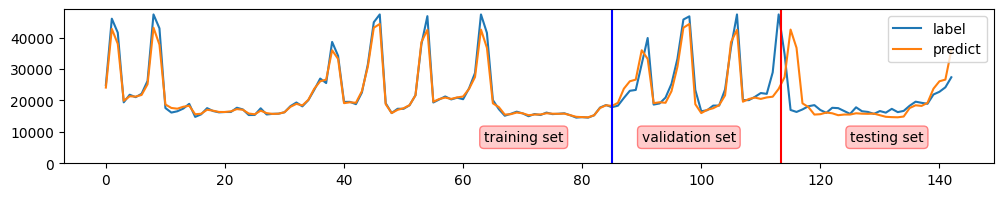

Store 1; Department: 2


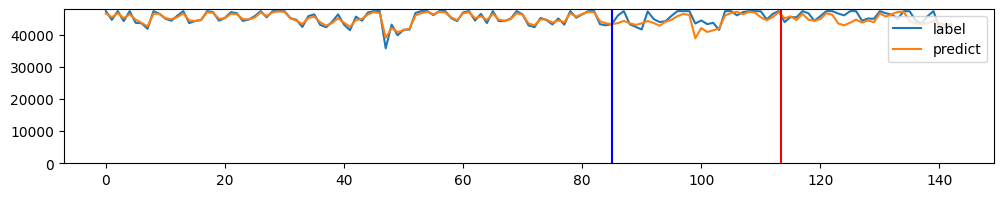

Store 1; Department: 3


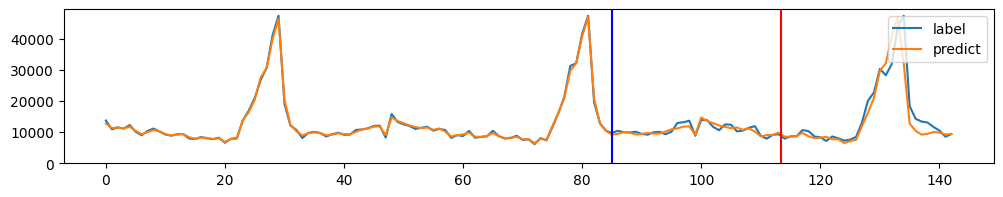

Store 1; Department: 4


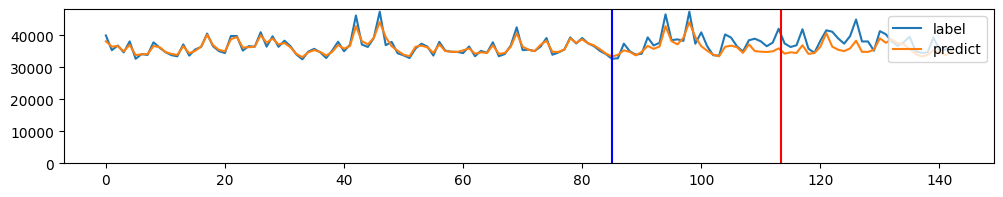

Store 1; Department: 5


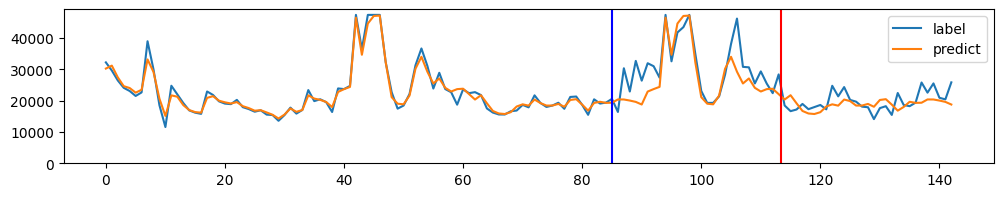

Store 1; Department: 6


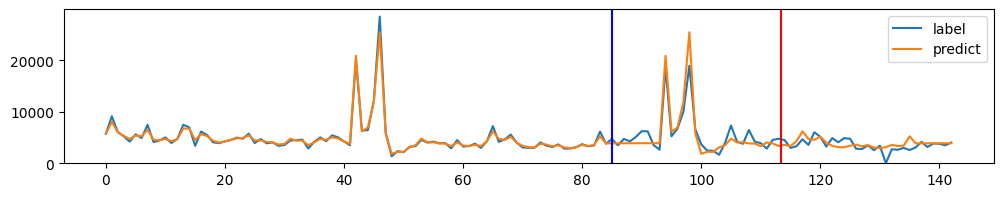

Store 1; Department: 7


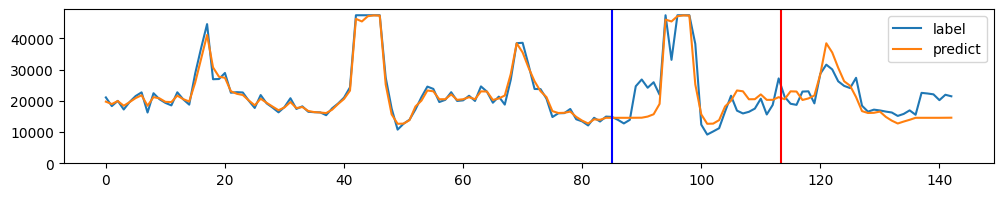

Store 1; Department: 8


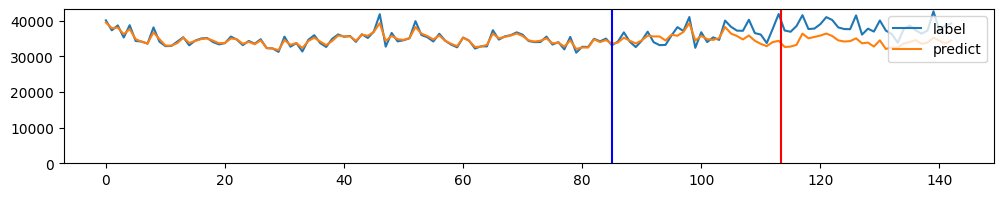

Store 1; Department: 9


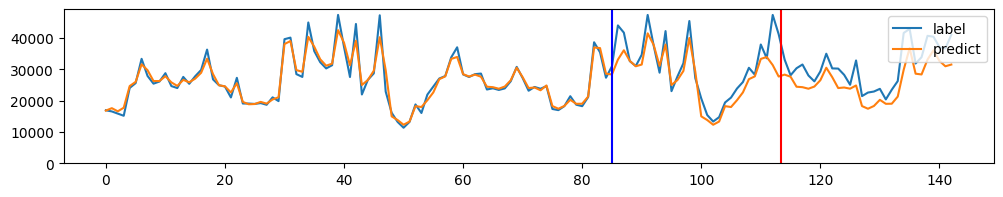

Store 1; Department: 10


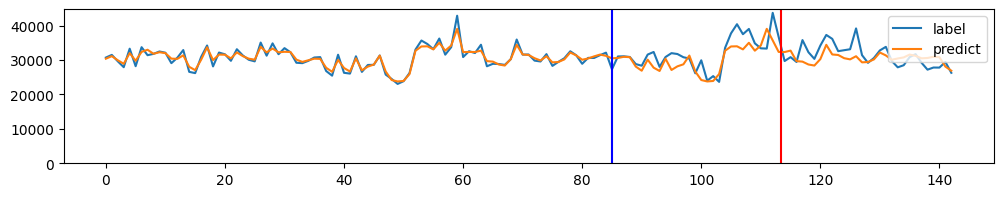

Store 1; Department: 11


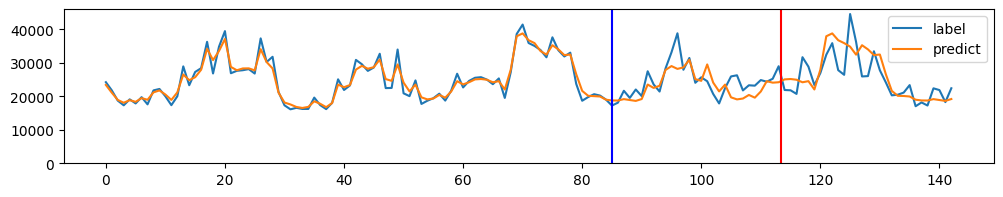

Store 1; Department: 12


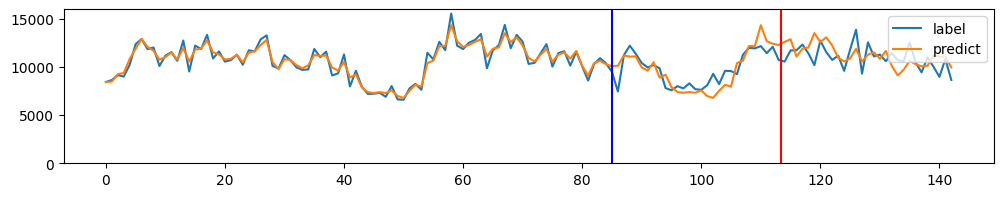

Store 1; Department: 13


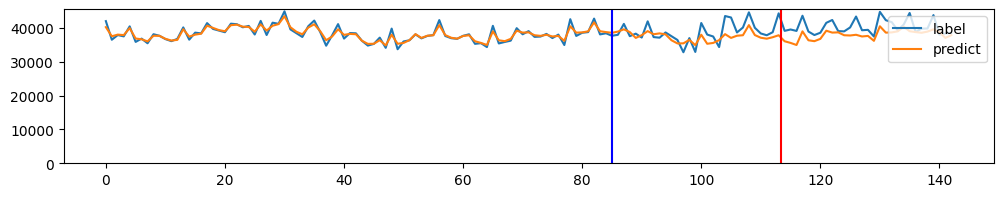

Store 1; Department: 14


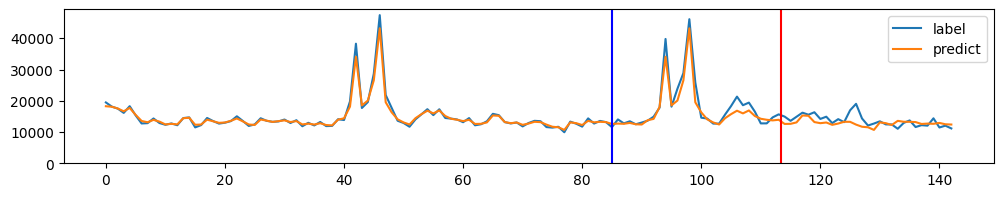

Store 1; Department: 16


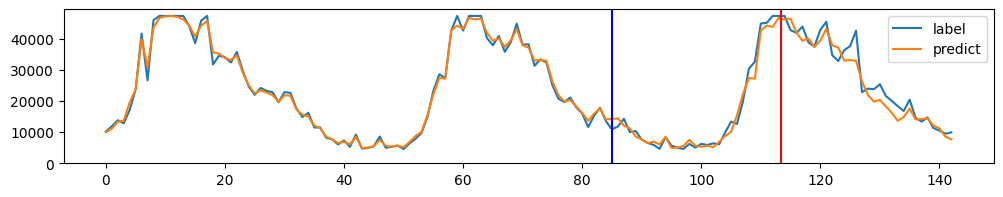

Store 1; Department: 17


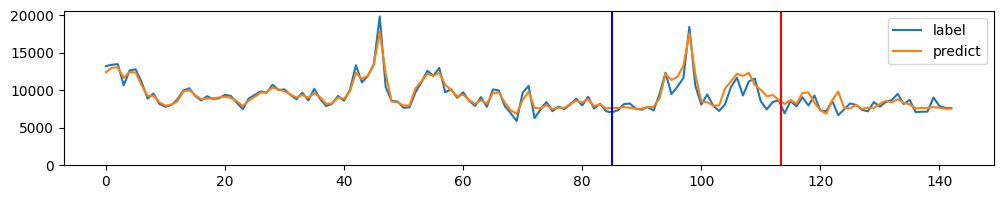

Store 1; Department: 18


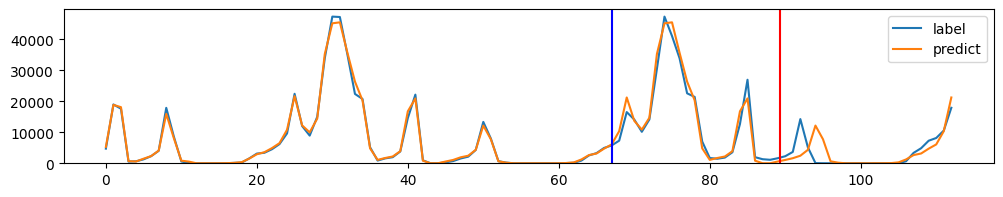

Store 1; Department: 19


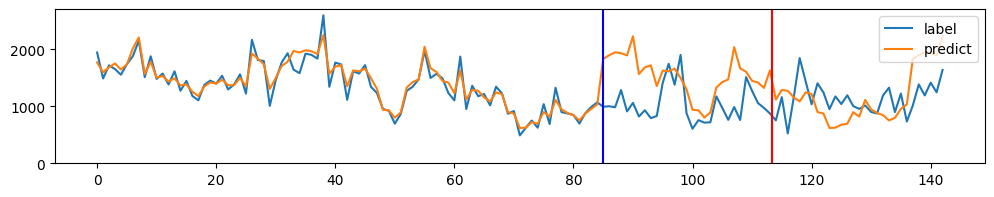

Store 1; Department: 20


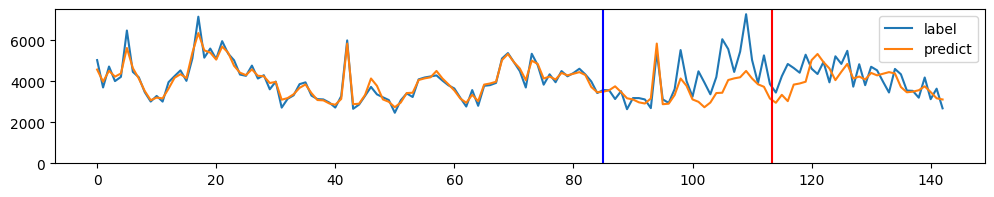

Store 1; Department: 21


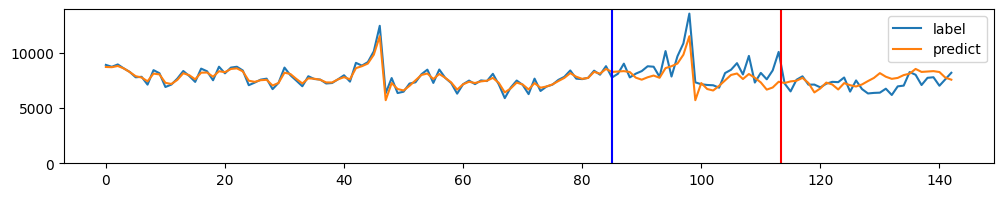

Store 1; Department: 22


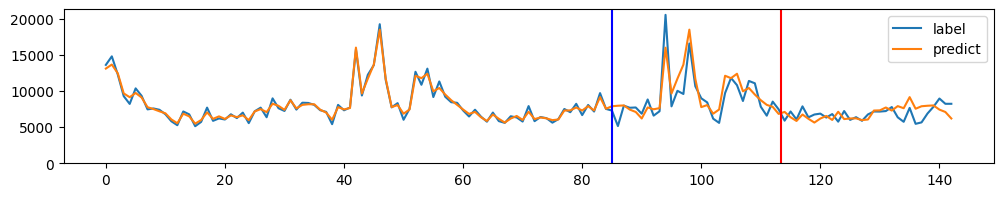

Store 1; Department: 23


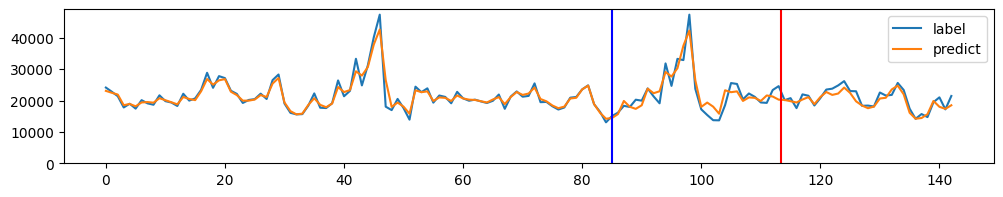

Store 1; Department: 24


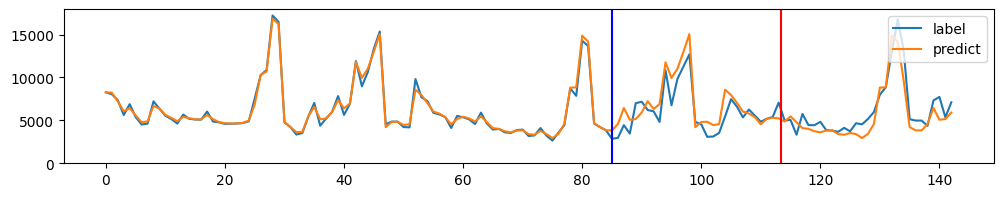

Store 1; Department: 25


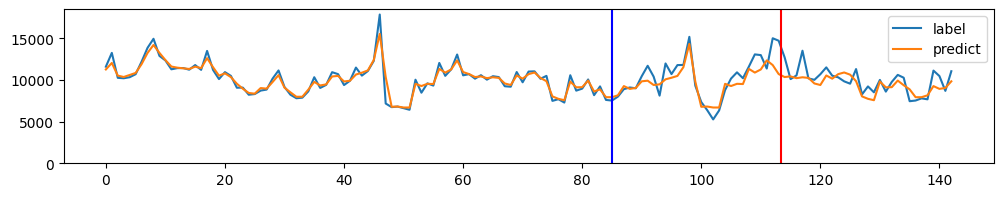

Store 1; Department: 26


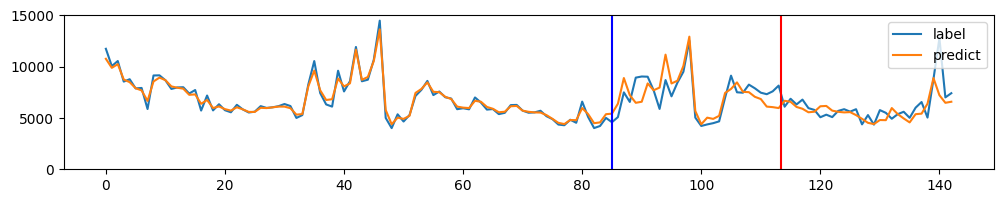

Store 1; Department: 27


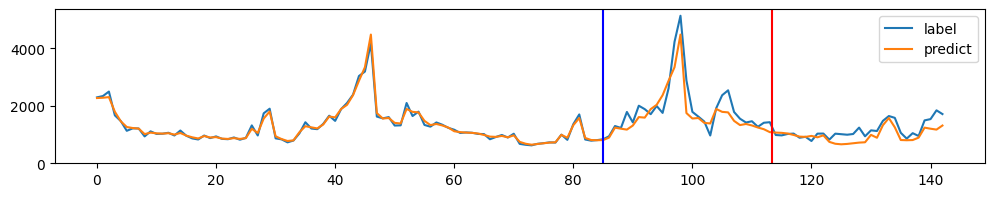

Store 1; Department: 28


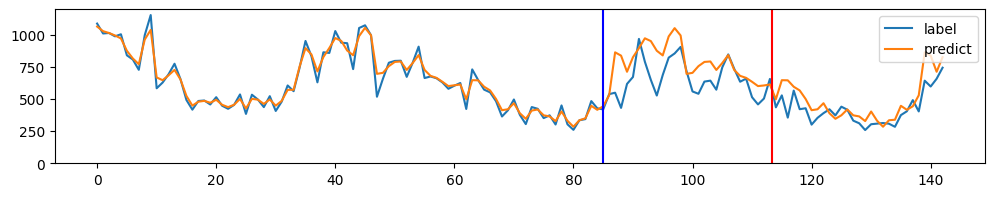

Store 1; Department: 29


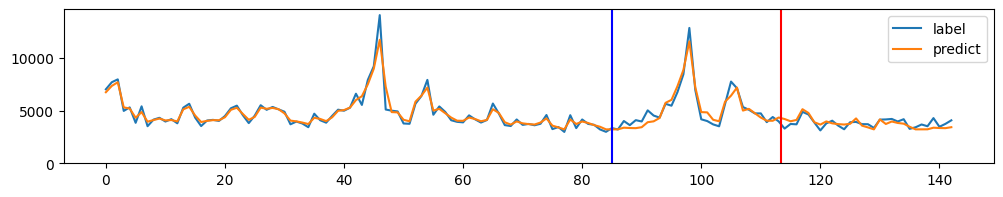

In [91]:
for i in range(30):
    sample = train_df[(train_df.Store == 1)*(train_df.Dept == i)]
    if len(sample) > 5:
        print(f"Store 1; Department: {i}")
        sample_X = sample.drop(columns=['Weekly_Sales','Date']).to_numpy()
        sample_y = sample.Weekly_Sales.to_numpy()
        
        l = int(0.6*len(sample_y))
        plt.figure(figsize = (12,2))
        sample_pred = reg.predict(sample_X)
        plt.plot(sample_y, label = "label")
        plt.plot(sample_pred, label = "predict")
        plt.axvline(x = l, color = 'b')
        plt.axvline(x = 4/3*l, color = 'r')
        plt.legend(loc="upper right")
        plt.ylim(bottom = 0) 
        if i == 1:
            plt.text(63.5, 7000, "training set", bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
            plt.text(90, 7000, "validation set", bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
            plt.text(125, 7000, "testing set", bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
        plt.show()

### 4.2 RandomForestRegressor2

### 4.2.1 train model (RandomForestRegressor2)

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rfr = RandomForestRegressor(criterion = "squared_error", max_depth=18, n_estimators = 600, max_features = 6, verbose = 1, n_jobs=-1)
reg2 = rfr.fit(X_train, y_train, sample_weight_train)
reg2.verbose = 0

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    7.9s finished


### 4.2.2 evaluate training set

#### find mean absolute error of training set

In [93]:
predict = reg2.predict(X_train)
mae = mean_absolute_error(predict, y_train, sample_weight = sample_weight_train)
print("weight-MAE:", mae) 

weight-MAE: 783.6137343174692


#### find R-squared of training set

In [94]:
score = reg2.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.9900147610679025


### 4.2.3 evaluate validation set

#### find mean absolute error of validation set

In [95]:
predict = reg2.predict(X_val)
mae = mean_absolute_error(predict, y_val, sample_weight = sample_weight_val)
print("weight-MAE:", mae) 

weight-MAE: 2087.014740199894


#### find R-squared of validation set

In [96]:
score = reg2.score(X_val, y_val)
print("R-squared:", score)

R-squared: 0.9046492939919247


#### find average of true_target

In [97]:
y_val.mean()

14748.98132104266

#### percent of weight-MAE

In [98]:
percent_mae = mae/y_val.mean()*100
print(f"percent of weight-MAE: {percent_mae:.2f}%") 

percent of weight-MAE: 14.15%


### 4.2.4 explore feature importance
 - The influence of each feature on the weekly sales is shown. The department feature is the most impactful to the weekly sales. 

In [99]:
features = train_df.drop(columns=['Weekly_Sales', 'Date']).columns
features = {k:v for k,v in zip(features, reg2.feature_importances_)}
features = dict(sorted(features.items(), key=lambda item: item[1],reverse=True))
features

{'Dept': 0.7080111203940451,
 'Size': 0.1585989818105982,
 'Store': 0.06100321062050691,
 'week': 0.029703965393957532,
 'Type': 0.028409242388765545,
 'month': 0.00828688413091978,
 'year': 0.0034059830492604868,
 'IsHoliday': 0.0025806122119463606}

### 4.2.5 evaluate testing set

#### find mean absolute error of validation set

In [100]:
predict = reg2.predict(X_test)
mean_absolute_error(predict, y_test, sample_weight = sample_weight_test)

1580.1720813707243

#### find R-squared of validation set

In [101]:
score = reg2.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.952224786638716


### 4.2.6 Visualize the performance on training, validation, and testing sets

Store 1; Department: 1


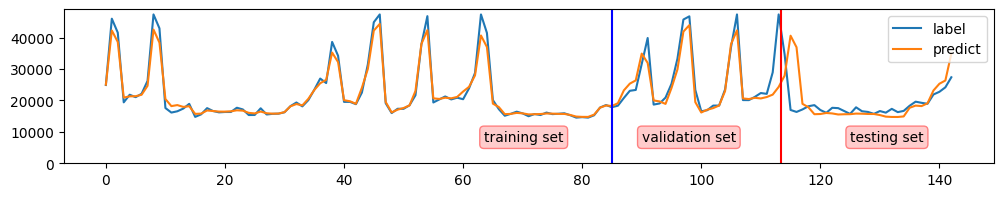

Store 1; Department: 2


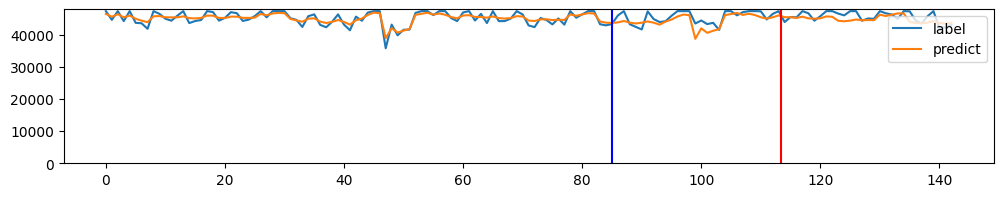

Store 1; Department: 3


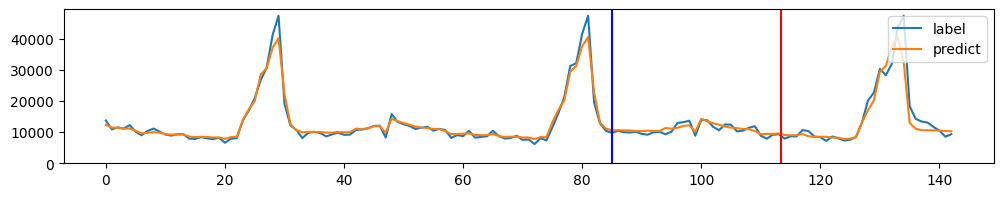

Store 1; Department: 4


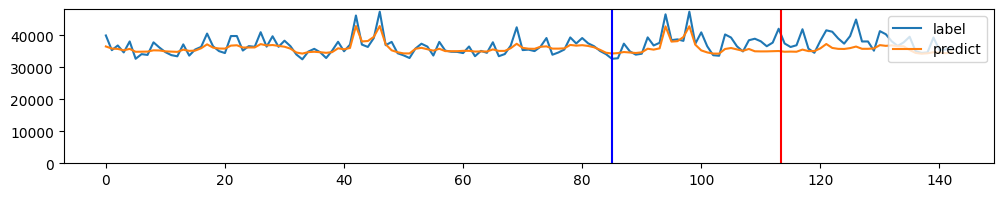

Store 1; Department: 5


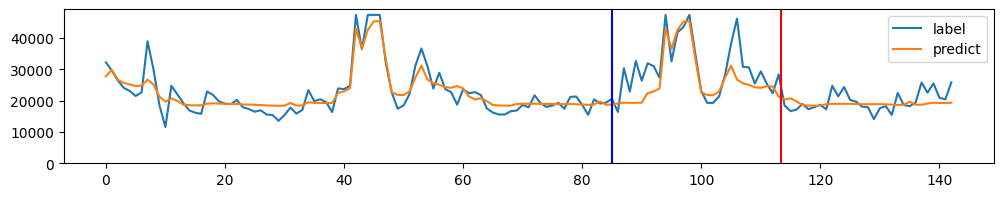

Store 1; Department: 6


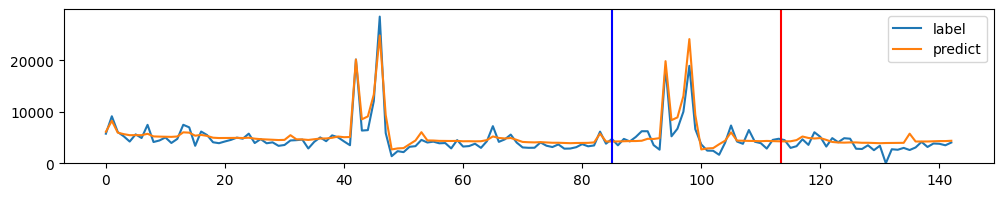

Store 1; Department: 7


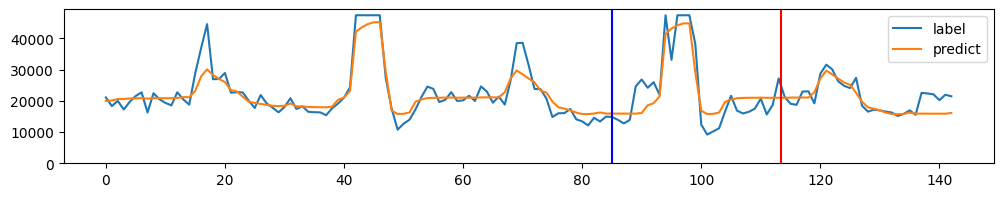

Store 1; Department: 8


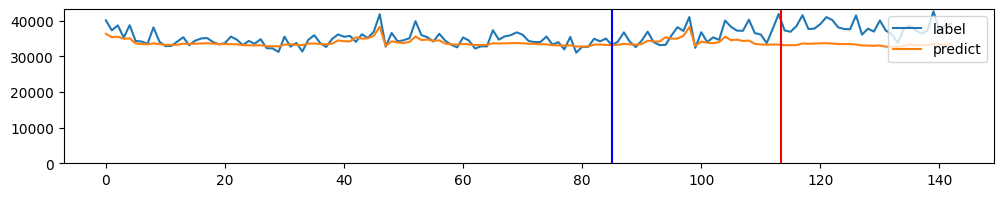

Store 1; Department: 9


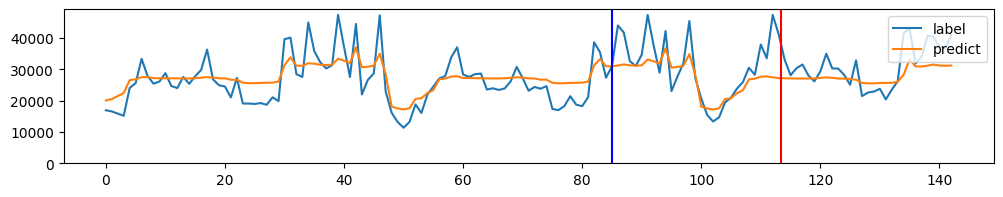

Store 1; Department: 10


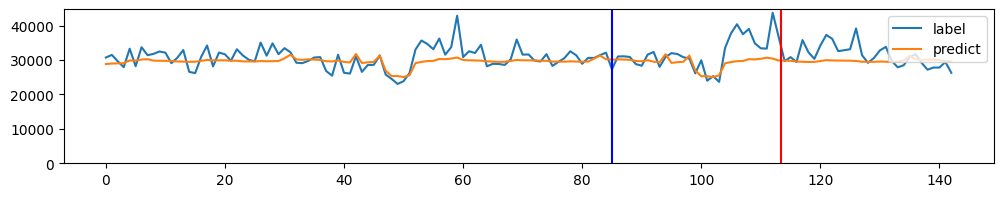

Store 1; Department: 11


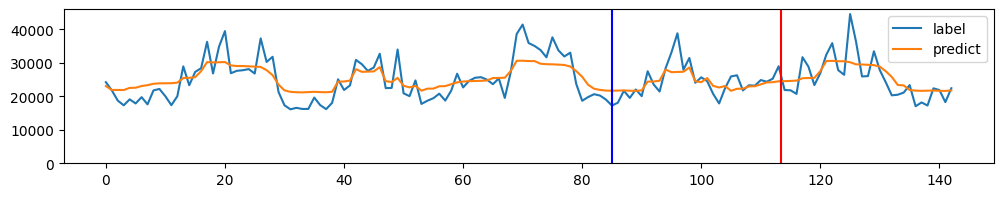

Store 1; Department: 12


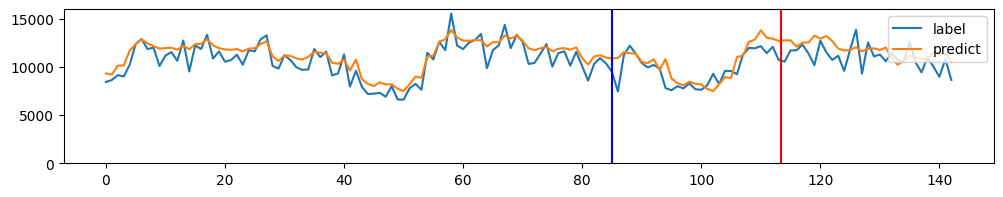

Store 1; Department: 13


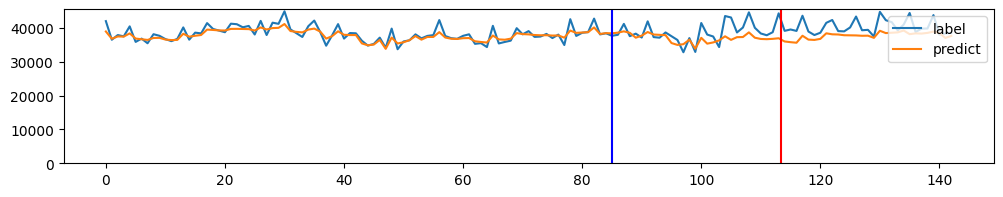

Store 1; Department: 14


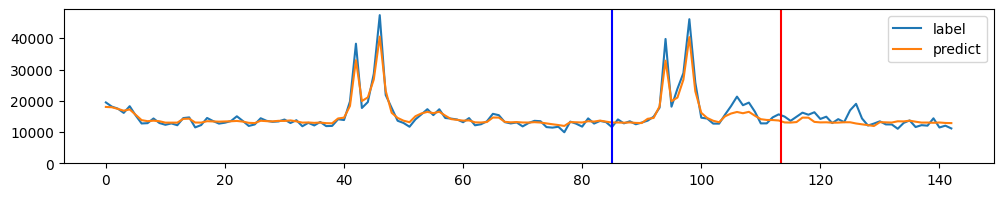

Store 1; Department: 16


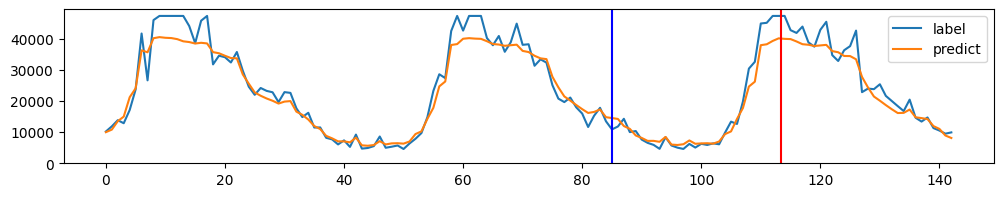

Store 1; Department: 17


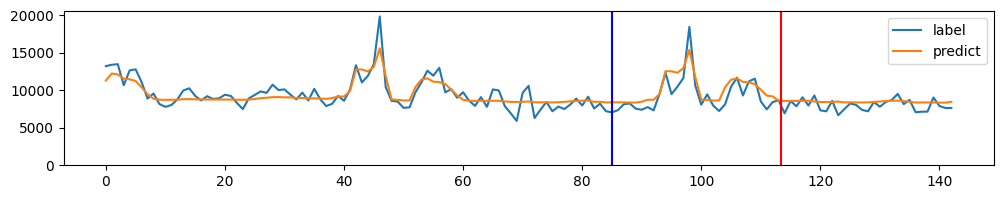

Store 1; Department: 18


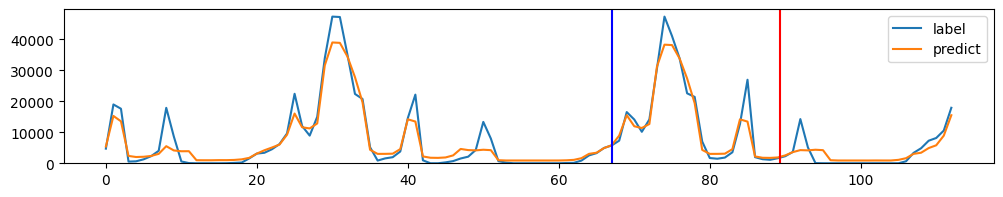

Store 1; Department: 19


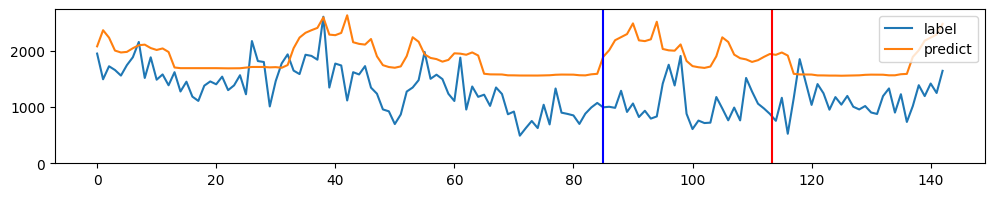

Store 1; Department: 20


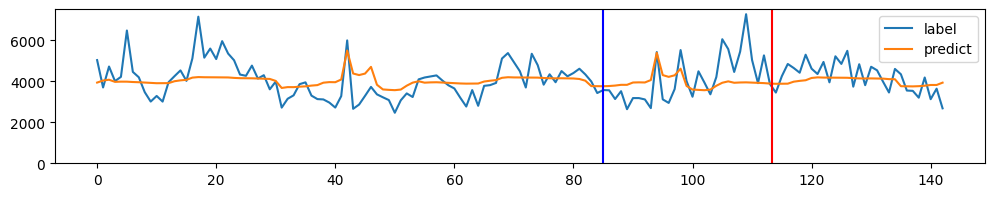

Store 1; Department: 21


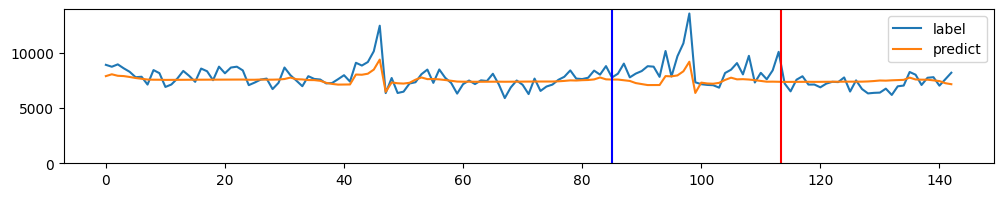

Store 1; Department: 22


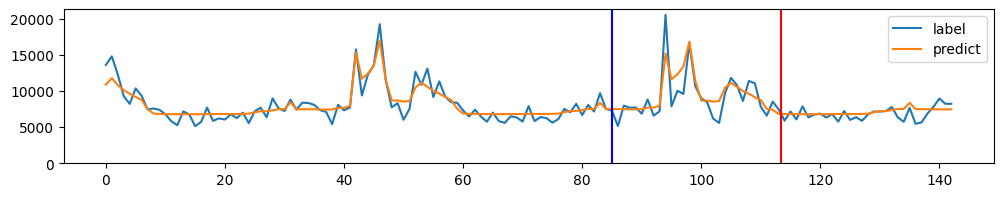

Store 1; Department: 23


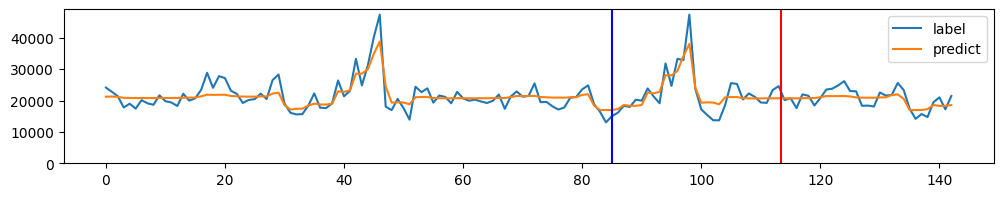

Store 1; Department: 24


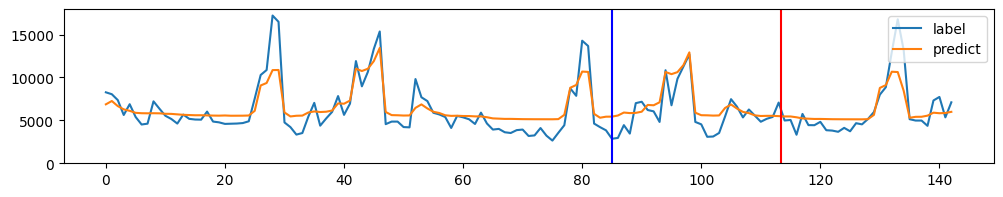

Store 1; Department: 25


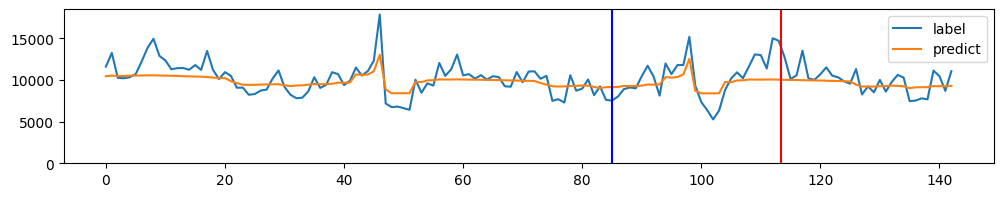

Store 1; Department: 26


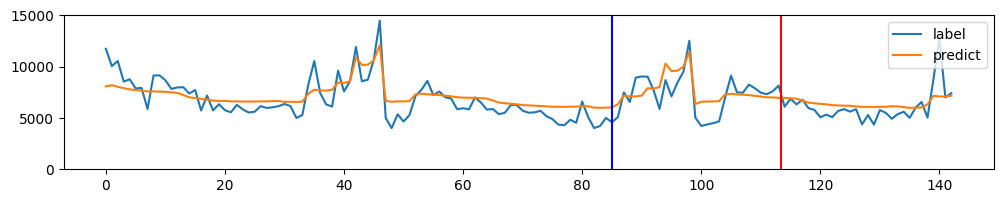

Store 1; Department: 27


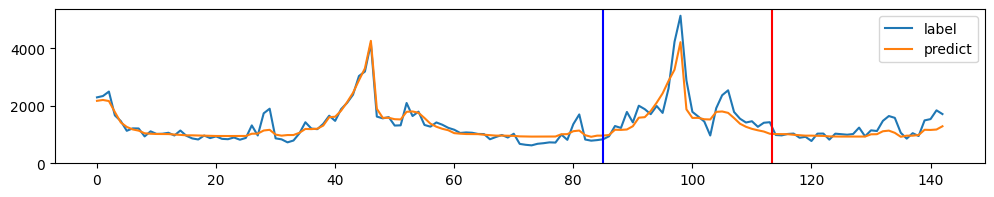

Store 1; Department: 28


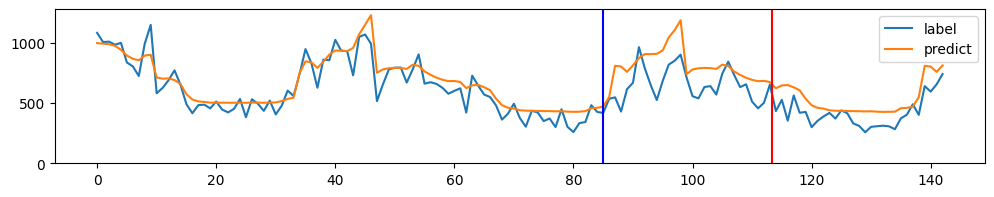

Store 1; Department: 29


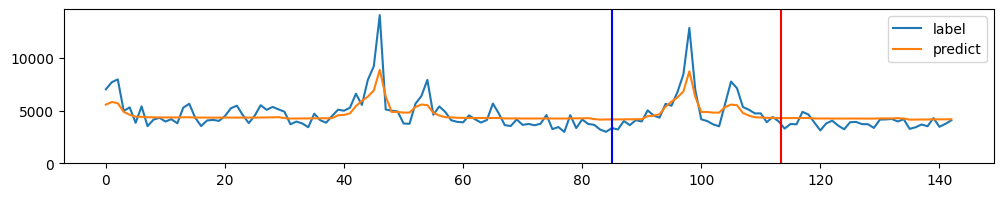

In [102]:
for i in range(30):
    sample = train_df[(train_df.Store == 1)*(train_df.Dept == i)]
    if len(sample) > 5:
        print(f"Store 1; Department: {i}")
        sample_X = sample.drop(columns=['Weekly_Sales','Date']).to_numpy()
        sample_y = sample.Weekly_Sales.to_numpy()
        
        l = int(0.6*len(sample_y))
        plt.figure(figsize = (12,2))
        sample_pred = reg2.predict(sample_X)
        plt.plot(sample_y, label = "label")
        plt.plot(sample_pred, label = "predict")
        plt.axvline(x = l, color = 'b')
        plt.axvline(x = 4/3*l, color = 'r')
        plt.legend(loc="upper right")
        plt.ylim(bottom = 0)
        
        if i == 1:
            plt.text(63.5, 7000, "training set", bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
            plt.text(90, 7000, "validation set", bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
            plt.text(125, 7000, "testing set", bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
        
        plt.show()

### 4.3 XGboost RandomForestRegressor

### 4.3.1 train model (XGboost RandomForestRegressor1)

In [ ]:
import xgboost
from sklearn.metrics import mean_squared_error
xgb = xgboost.XGBRFRegressor(n_estimators = 600, 
                             max_depth = 35,
                             eval_metric = mean_squared_error,
                             learning_rate = 1.0, 
                             n_jobs = -1, 
                             gpu_id = 0,)
xgb = xgb.fit(X_train, y_train, sample_weight = sample_weight_train)

**save model**

In [ ]:
#xgb.save_model("walmart-recruiting-store-sales-forecasting/xgb.json")
xgb.save_model("walmart-recruiting-store-sales-forecasting/xgb.txt")

### 4.3.2 evaluate training set

#### find mean absolute error of training set

In [ ]:
predict = xgb.predict(X_train)
mae = mean_absolute_error(predict, y_train, sample_weight = sample_weight_train)
print("weight-MAE:", mae) 

#### find R-squared of training set

In [ ]:
score = xgb.score(X_train, y_train)
print("R-squared:", score) 

### 4.3.3 evaluate validation set

#### find mean absolute error of validation set

In [ ]:
predict = xgb.predict(X_val)
mae = mean_absolute_error(predict, y_val, sample_weight = sample_weight_val)
print("weight-MAE:", mae) 

#### find R-squared of validation set

In [ ]:
score = xgb.score(X_val, y_val)
print("R-squared:", score)

#### percent of weight-MAE

In [ ]:
percent_mae = mae/y_val.mean()*100
print(f"percent of weight-MSE: {percent_mae:.2f}%") 

### 4.3.4 explore feature importance
 - The influence of each feature on the weekly sales is shown. The department feature is the most impactful to the weekly sales. 

In [ ]:
features = train_df.drop(columns=['Weekly_Sales', 'Date']).columns
features = {k:v for k,v in zip(features, xgb.feature_importances_)}
features = dict(sorted(features.items(), key=lambda item: item[1],reverse=True))
features

### 4.3.5 evaluate testing set

#### find mean absolute error of validation set

In [ ]:
predict = xgb.predict(X_test)
mean_absolute_error(predict, y_test, sample_weight = sample_weight_test)

#### find R-squared of validation set

In [ ]:
score = xgb.score(X_test, y_test)
print("R-squared:", score)

### 4.3.6 Visualize the performance on training, validation, and testing sets

In [ ]:
for i in range(20):
    sample = train_df[(train_df.Store == 1)*(train_df.Dept == i)]
    if len(sample) > 5:
        print(f"Store 1; Department: {i}")
        sample_X = sample.drop(columns=['Weekly_Sales','Date']).to_numpy()
        sample_y = sample.Weekly_Sales.to_numpy()
        
        l = int(0.6*len(sample_y))
        plt.figure(figsize = (12,2))
        sample_pred = xgb.predict(sample_X)
        plt.plot(sample_y, label = "label")
        plt.plot(sample_pred, label = "predict")
        plt.axvline(x = l, color = 'b')
        plt.axvline(x = 4/3*l, color = 'r')
        plt.legend(loc="upper right")
        plt.ylim(bottom = 0) 
        if i == 1:
            plt.text(63.5, 7000, "training set", bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
            plt.text(90, 7000, "validation set", bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
            plt.text(125, 7000, "testing set", bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8),))
        plt.show()

## testing (kaggle)
- RandomForestRegressor1 -- deep tree better performance (prefer to used)
- to submit kaggle use entire data will recieve better score

In [109]:
predict_test = xgb.predict(X_real_test)

In [110]:
submission_ = test.copy()
submission_['Weekly_Sales'] = predict_test
submission_["Id"] = [f"{i}_{j}_{k}" for i, j, k in zip(submission_.Store, submission_.Dept, submission_.Date)]
Submission_ = submission_[['Id', 'Weekly_Sales']]
Submission_

,Id,Weekly_Sales
0,1_1_2012-11-02,32668.845703
1,1_1_2012-11-09,19674.974609
2,1_1_2012-11-16,19584.613281
3,1_1_2012-11-23,18914.943359
4,1_1_2012-11-30,21696.365234
...,...,...
115059,45_98_2013-06-28,925.051758
115060,45_98_2013-07-05,997.669067
115061,45_98_2013-07-12,941.374573
115062,45_98_2013-07-19,641.854736


In [111]:
Submission_.to_csv('walmart-recruiting-store-sales-forecasting/SubmissionXgbRf.csv', index=False)